### Text and Annotation

• Creating a good visualization involves guiding the reader so that the figure tells a story.

• In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.

• Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.

• Let’s take a look at some data and how we might visualize and annotate it to help convey interesting information.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

### Example: Effect of Holidays on US Births

• Let’s return to some data we worked with earlier, where we generated a plot of average births over the course of the calendar year.

• We’ll start with the same cleaning procedure we used there, and plot the results.

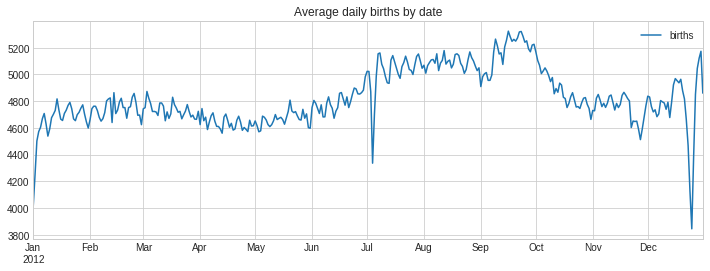

In [17]:
births = pd.read_csv('births.csv')

quantiles = np.percentile(births['births'], [25, 50, 70])
mu, sig = quantiles[1], .74 * (quantiles[2] - quantiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize = (12, 4))

births_by_date.plot(ax = ax)

plt.title('Average daily births by date');

• When we’re communicating data like this, it is often useful to annotate certain features of the plot to draw the reader’s attention.

• This can be done manually with the plt.text / ax.text command, which will place text at a particular x/y value.

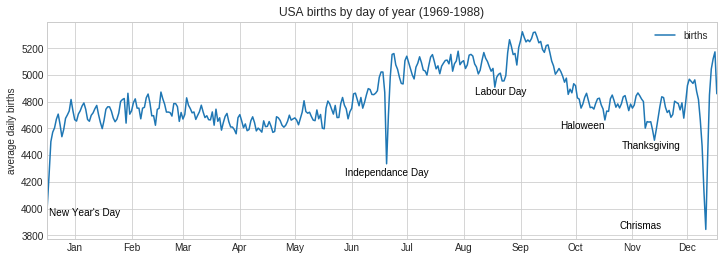

In [23]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

# Add labels to the plot
style = dict(size = 10, color = 'k')

ax.text('2012-01-02', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independance Day", **style, ha = 'center')
ax.text('2012-09-04', 4850, "Labour Day", **style, ha = 'center')
ax.text('2012-10-31', 4600, "Haloween", **style, ha = 'right')
ax.text('2012-11-25', 4450, "Thanksgiving", **style, ha = 'center')
ax.text('2012-12', 3850, "Chrismas", **style, ha = 'right')

# Label the axes
ax.set(title = 'USA births by day of year (1969-1988)', ylabel = 'average daily births')

# Format the x-axis with the centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h'));

• The ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.

• Here we used ha='right' and ha='center' , where ha is short for horizonal alignment.

• See the docstring of plt.text() and of mpl.text.Text() for more information on available options.